<a href="https://colab.research.google.com/github/sunilkumar1762/Rapidious_Assignment/blob/main/Rapidious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EpiRecipes Visualization Application

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset
df = pd.read_csv("/content/Receipe_Visualiazation.csv")
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Checking missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,Truffled Mac 'N' Cheese,4.375,NaN,NaN,NaN,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10475,White Butter Sauce with Cream Beurre Nantais,3.750,671.0,1.0,72.0,22.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10476,Lentil and Vegetable Stew with Kale,3.750,NaN,NaN,NaN,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10477,Crab Salad with Endive and Tomato-Cilantro Sauce,4.375,327.0,8.0,30.0,278.0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Removing rows where critical nutrient info is missing
df_clean = df.dropna(subset=['calories', 'protein', 'fat', 'sodium'])

# Check the shape after removing missing data
df_clean.shape


(8299, 680)

In [5]:
# Removing duplicates
df_clean = df_clean.drop_duplicates()

# shape after removing duplicates
df_clean.shape


(7903, 680)

In [6]:
#  removing outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


df_no_outliers = df_clean.copy()

# Removing outliers from each column
df_no_outliers = remove_outliers(df_no_outliers, 'calories')
df_no_outliers = remove_outliers(df_no_outliers, 'protein')
df_no_outliers = remove_outliers(df_no_outliers, 'fat')
df_no_outliers = remove_outliers(df_no_outliers, 'sodium')

# shape of the dataset
print("Original dataset shape:", df_clean.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)


Original dataset shape: (7903, 680)
Dataset shape after removing outliers: (6276, 680)


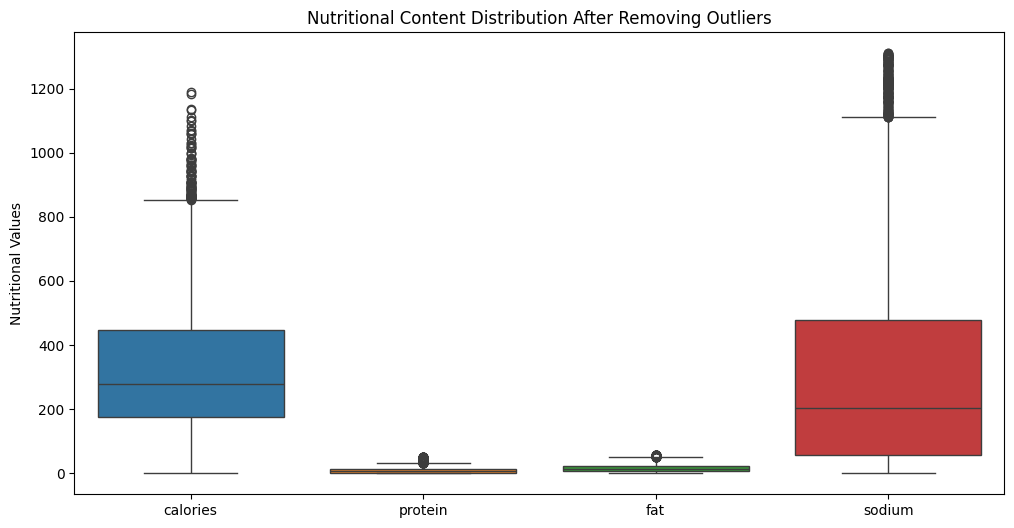

In [7]:
# distribution of nutritional content after outliers are removed
plt.figure(figsize=(12,6))
sns.boxplot(data=df_no_outliers[['calories', 'protein', 'fat', 'sodium']])
plt.title('Nutritional Content Distribution After Removing Outliers')
plt.ylabel('Nutritional Values')
plt.show()


##Performing Exploratory Data Analysis

In [8]:
# Filter (rating > 4.0)
high_rated_recipes = df_clean[df_clean['rating'] > 4.0]

# Select ingredient columns
ingredient_columns = df_clean.columns[7:]

# Converting categorical ingredient columns to numerical
high_rated_recipes[ingredient_columns] = high_rated_recipes[ingredient_columns].apply(lambda col: pd.to_numeric(col, errors='coerce'))

common_ingredients = high_rated_recipes[ingredient_columns].sum().sort_values(ascending=False).head(10)

common_ingredients


,0
bon appétit,2237.0
peanut free,1962.0
soy free,1902.0
tree nut free,1644.0
vegetarian,1513.0
gourmet,1486.0
kosher,1413.0
pescatarian,1389.0
quick & easy,1096.0
bake,1091.0


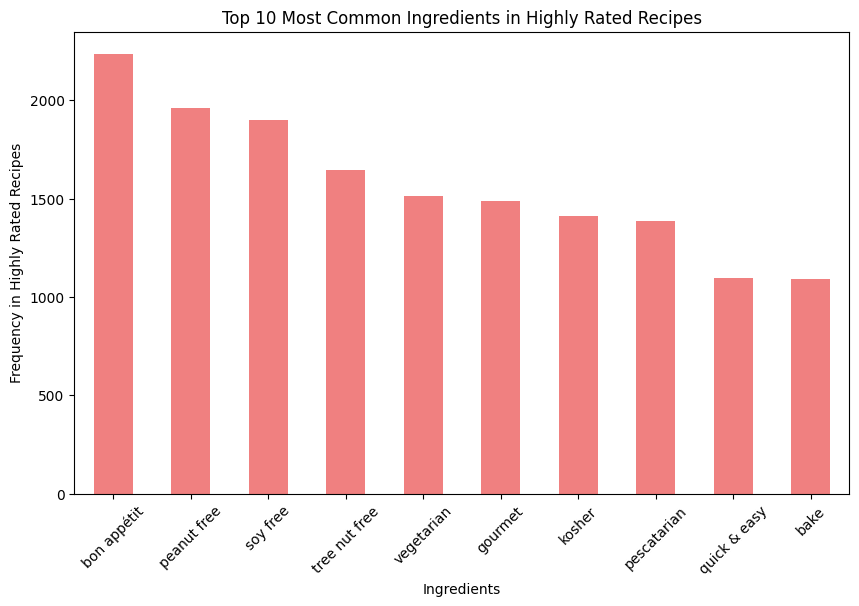

In [9]:
# most common ingredients in highly rated recipes
plt.figure(figsize=(10,6))
common_ingredients.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Common Ingredients in Highly Rated Recipes')
plt.xlabel('Ingredients')
plt.ylabel('Frequency in Highly Rated Recipes')
plt.xticks(rotation=45)
plt.show()


The Top 10 Most Common Ingredients in Highly Rated Recipes plot reveals important insights into the ingredients that consistently contribute to the success of recipes with a rating above 4.0.

This Bar plot tells a story about how specific ingredients consistently lead to recipe success, providing a roadmap for both users and chefs to create and discover dishes that are flavorful, satisfying, and highly rated.

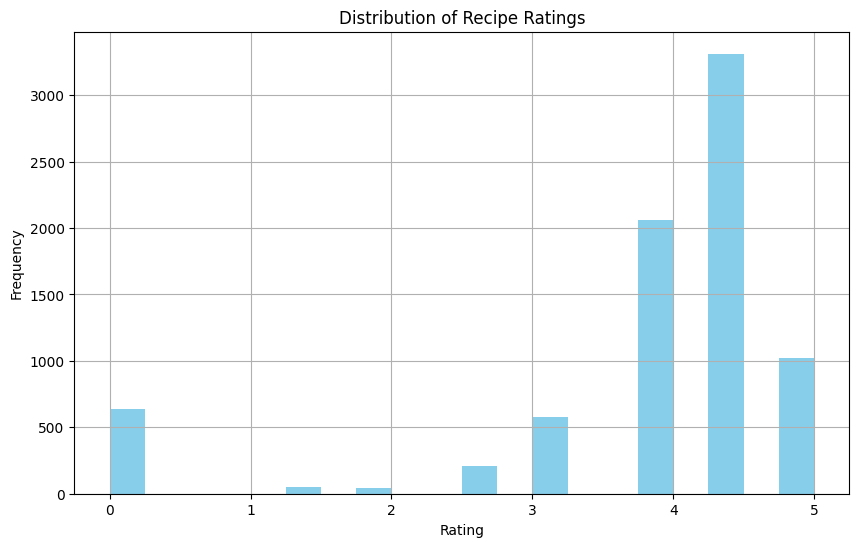

In [10]:
# distribution of ratings
plt.figure(figsize=(10, 6))
df_clean['rating'].hist(bins=20, color='skyblue')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


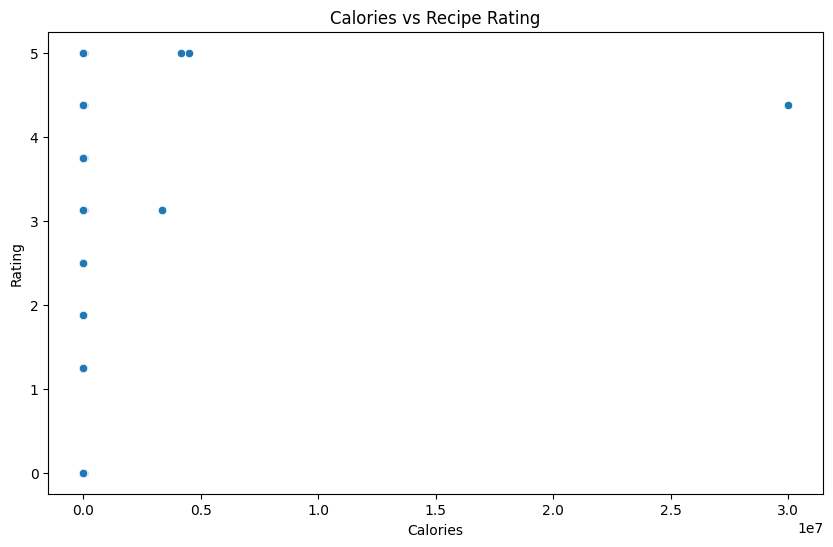

In [11]:
#  calories vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df_clean)
plt.title('Calories vs Recipe Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()


The scatter plot of calories versus recipe ratings reveals a nuanced relationship, emphasizing that while calorie content is a consideration, it is not the sole determinant of user satisfaction. This understanding encourages recipe developers to prioritize flavor and quality, while also providing a diverse range of options for users. By focusing on what truly delights consumers, recipe platforms can enhance user experience and foster loyalty among their audience.

In [14]:
# average nutritional content for high-rated recipes
high_rated = df_clean[df_clean['rating'] > 4]

avg_nutrients = high_rated[['calories', 'protein', 'fat', 'sodium']].mean()

avg_nutrients

,0
calories,9465.874683
protein,163.687284
fat,488.882068
sodium,9590.836834


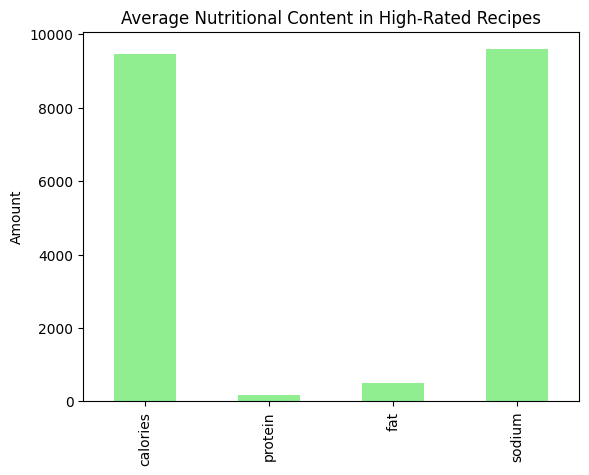

In [15]:
# average nutritional values for high-rated recipes (rating > 4)
high_rated = df_clean[df_clean['rating'] > 4.0]
avg_nutrients = high_rated[['calories', 'protein', 'fat', 'sodium']].mean()

# average nutritional values
avg_nutrients.plot(kind='bar', color='lightgreen')
plt.title('Average Nutritional Content in High-Rated Recipes')
plt.ylabel('Amount')
plt.show()


The Plot shows, the average nutritional content of high-rated recipes serves as a valuable guide for understanding user preferences and crafting appealing dishes. By promoting balanced meals that emphasize moderation in calories, protein, fat, and sodium, recipe creators and platforms can significantly enhance user satisfaction and loyalty. This data-driven approach not only aligns with health trends but also ensures that users can enjoy delicious, well-balanced meals that keep them coming back for more.

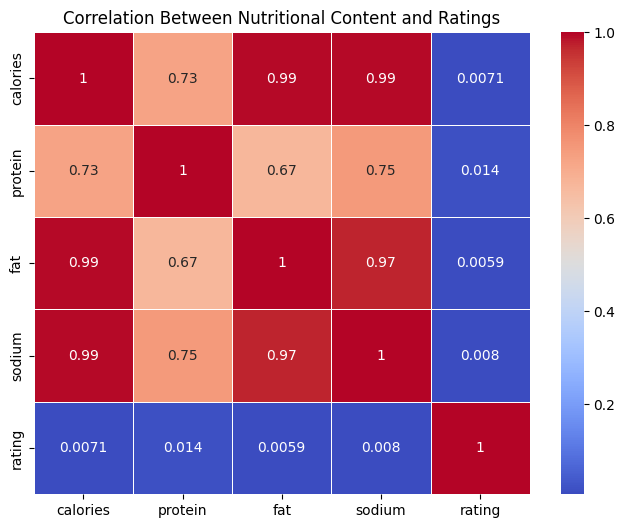

In [16]:
# correlation between nutritional content and ratings
plt.figure(figsize=(8,6))
corr_matrix = df_clean[['calories', 'protein', 'fat', 'sodium', 'rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Nutritional Content and Ratings')
plt.show()


The heatmap demonstrates that nutritional content such as calories, protein, fat, and sodium have minimal direct impact on how recipes are rated by users. This suggests that users may be more focused on other factors, such as flavor, preparation time, or ingredient variety, when determining their satisfaction with a recipe.

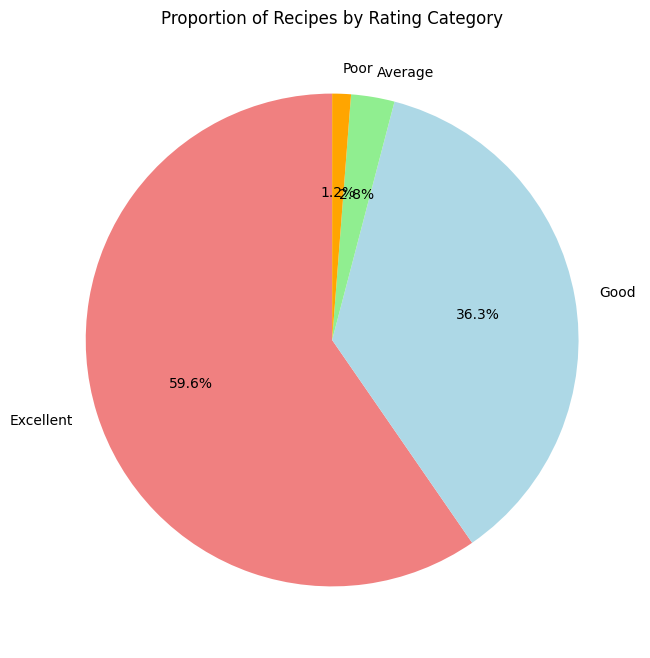

In [17]:
# Categorize ratings
df_clean['rating_category'] = pd.cut(df_clean['rating'], bins=[0, 2, 3, 4, 5], labels=['Poor', 'Average', 'Good', 'Excellent'])

rating_counts = df_clean['rating_category'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'orange'])
plt.title('Proportion of Recipes by Rating Category')
plt.show()


The pie chart highlights that the majority of recipes receive Good to Excellent ratings, which reflects overall user satisfaction with the recipe collection. However, there are also opportunities for improvement in the Average and Poor categories. Recipe developers can focus on enhancing these recipes by addressing possible shortcomings in flavor, preparation, or ingredient choice, ensuring that they meet user expectations.

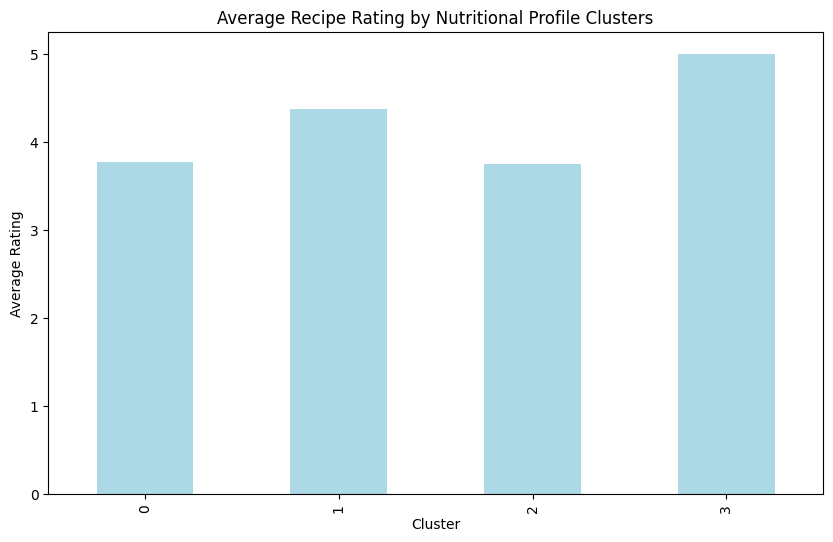

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# nutritional columns for clustering
X = df_clean[['calories', 'protein', 'fat', 'sodium']].fillna(0)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

# average rating in each cluster
cluster_ratings = df_clean.groupby('cluster')['rating'].mean()

# average rating for each cluster
plt.figure(figsize=(10,6))
cluster_ratings.plot(kind='bar', color='lightblue')
plt.title('Average Recipe Rating by Nutritional Profile Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.show()


The clustering analysis of recipes based on their nutritional profiles reveals a clear connection between balanced nutrition and higher user ratings. By focusing on improving and promoting recipes from clusters with higher ratings, the recipe platform can enhance user satisfaction and provide more targeted recommendations. This data-driven approach can help chefs and recipe developers create dishes that better align with user preferences and trends.

SUMMARY INSIGHTS ::
1. The distribution of ratings shows that most recipes are rated between 3.0 and 4.5, with fewer recipes rated 5.0.
2. There is no clear correlation between calories and ratings, as recipes with both low and high calories receive a variety of ratings.
3. High-rated recipes (rating > 4.0) tend to have moderate calories, protein, fat, and sodium levels, making them balanced in nutritional content.



RECOMMENDATIONS::

1.Implement a recommendation system based on highly-rated ingredients. This helps users discover recipes they are likely to enjoy.
2. Provide better nutritional filtering, showing recipes with balanced nutrition profiles (calories, protein, fat, sodium) similar to those of highly-rated recipes.
3. Allow users to filter or search for recipes based on specific ingredients they prefer, ensuring more personalized suggestions.
4. Enable users to sort recipes based on preparation time to match their cooking schedule.
